In [33]:
import sys
from scipy.stats import binom
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy as scp
import arviz as az

print("""
This notebook was created using:
Python {}
PyMC {}
ArviZ {}
NumPy {}
SciPy {}
Matplotlib {}
""".format(sys.version[:5], pm.__version__, az.__version__, np.__version__, scp.__version__, matplotlib.__version__))


This notebook was created using:
Python 3.8.1
PyMC 4.0.0
ArviZ 0.12.1
NumPy 1.22.4
SciPy 1.4.1
Matplotlib 3.1.3



In [9]:
# pmf is the probability of the of p=0.5 given 6 positive out of 9 samples
binom.pmf(6,9,0.5)

# The probability of the prior p can be vectorized
binom.pmf(6,9, np.linspace(0, 1, 10))

array([0.00000000e+00, 1.11011165e-04, 4.75960372e-03, 3.41411370e-02,
       1.11011165e-01, 2.16818683e-01, 2.73129096e-01, 2.04068009e-01,
       5.68377167e-02, 0.00000000e+00])

In [42]:

# the grid approximation method

def grid_approx(num_points, priors):
    grid_points = np.linspace(0, 1, num_points) # we want 20 grid points

    likelihood = binom.pmf(6,9, grid_points)

    unstd_posterior = priors * likelihood

    posterior = unstd_posterior / sum(unstd_posterior)
    
    return posterior
    

def plot_probabilities(posterior, priors, title):
    fig, ax = plt.subplots() 
    ax.set_xlabel('parameter p, or probability of water')
    ax.set_ylabel('posterior probability')
    ax.set_title(title)
    ax.plot(posterior)
    ax.plot(priors)


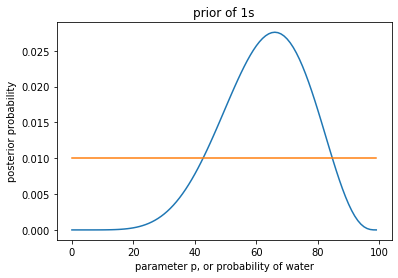

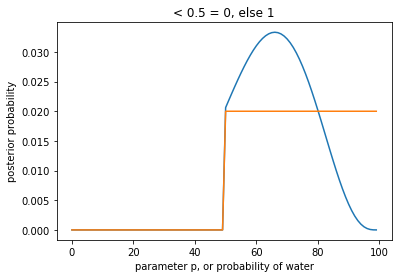

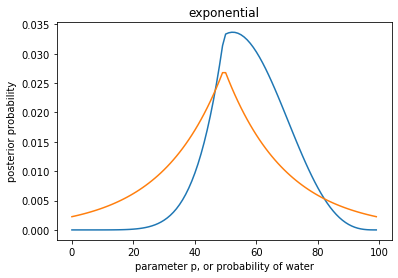

In [52]:
# let's plot this motherfucker
num_points = 100
priors = np.repeat(1, num_points)
posterior = grid_approx(num_points, priors)
plot_probabilities(posterior, priors/sum(priors), 'prior of 1s')

half_num_points = int(num_points/2)
priors = np.concatenate([np.zeros(half_num_points), np.ones(half_num_points)])
posterior = grid_approx(num_points, priors)
plot_probabilities(posterior, priors/sum(priors), '< 0.5 = 0, else 1')

priors = np.exp(-5 * abs(np.linspace(0, 1, num_points) - 0.5))
posterior = grid_approx(num_points, priors)
plot_probabilities(posterior, priors/sum(priors), 'exponential')





In [23]:
len(data)

9

In [19]:
# n=9: land=3, water=6
data = np.repeat((0,1), (3,6))

with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())

    idata = pm.sample()

        
        

    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
The acceptance probability does not match the target. It is 0.882, but should be close to 0.8. Try to increase the number of tuning steps.


In [36]:
# from pymc resources:
data = np.repeat((0, 1), (3, 6)) # This is the land/water tossing data
with pm.Model() as normal_aproximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]

mean_q['p'], std_q # <-- no idea what std_q is.

(array(0.66666667), array([0.63960215]))

(array(0.66666667), array([0.63960215]))

In [12]:
np.repeat(5, 20)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

### 2M3
Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered
in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know
which—was tossed in the air and produced a “land” observation. Assume that each globe was equally
likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on
seeing “land” (Pr(Earth|land)), is 0.23


In [39]:
# P(Earth|land) = (P(land|Earth) * P(Earth)) / P(land)
p_land = (0.3*0.5 + 1*0.5) # P(land) * P(Earth) + P(land) * P(Mars)
p_land_earth = 0.3
p_earth = 0.5
p_land_earth * p_earth / p_land


0.23076923076923075

### 2M4

Suppose you have a deck with only three cards. Each card has two sides, and each side is either
black or white. One card has two black sides. The second card has one black and one white side. The
third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone
reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up,
but you don’t know the color of the side facing down. Show that the probability that the other side is
also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This
means counting up the ways that each card could produce the observed data (a black side facing up
on the table).

There is BB, BW, and WW

how many ways can you get a black card on first draw?

B1 of BB
B2 of BB
B of BW

How many ways can you get a black card when flipping?

You could get B2 from B1, or B1 from B2, so 2

2/3

2M5
Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is
drawn from the bag and a black side appears face up. Again calculate the probability that the other
side is black

B1 of BB1
B2 of BB1
B1 of BB2
B2 of BB2
B of BW

4/5

2M6
Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white
sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume
there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that
for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to
pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that
the probability the other side is black is now 0.5. Use the counting method, as before


1 x B1 of BB
1 x B2 of BB
2 x B of BW

2/4 = 0.5









2H1
Suppose there are two species of panda bear. Both are equally common in the wild and live
in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay
capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins
10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise
birthing singleton infants. Assume these numbers are known with certainty, from many years of field
research.

Now suppose you are managing a captive panda breeding program. You have a new female panda
of unknown species, and she has just given birth to twins. What is the probability that her next birth
will also be twins?



---
This is a conditional probability

P(t2|t1) = P(t1,t2)/P(t)

P(t) is probability of getting twins, so its

```
P(t) = P(t|A) + P(A) + P(t|B) * P(B)
= 0.1 * 0.5 + 0.2 * 0.5
= 0.15
```

P(t1,t2) is the probability that 2 births are twins. The probability that species A birth 2 twins is 0.1 * 0.1. The probability that species B birth 2 twins is 0.2 * 0.2. 

```
P(t1,t2) = 0.1^2 * 0.5 + 0.2^2 * 0.5 = 0.025
```

P(t1,t2) / P(t) = 0.025/0.15 = 0.17



2H2
Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

P(A|t) = P(t|A) * P(A) / P(t)

= (0.1 * 0.5) / 0.15

2H3.
Continuing on from the previous problem, suppose the same panda mother has a second birth
and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is
species A.

P(A|t1,s2) = P(t1,s2,A) / P(t1,s2)

```
P(t1,s2) = ways to get 1 twin then 1 singleton from a and b

From A: 0.1 * 0.9
From B: 0.2 * 0.8

P(t1,s2) = 0.5 * (0.1 * 0.9) + 0.5 * (0.2 * 0.8)

P(t1,s2,A) = 0.5 * (0.1 * 0.9)

P(A|t1,s2) = P(t1,s2,A) / P(t1,s2) =
=(0.5 * (0.1 * 0.9)) / (0.5 * (0.1 * 0.9) + 0.5 * (0.2 * 0.8))
= 0.36

```


2H4. 
A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of
the data, even if the data are of different types.
So suppose now that a veterinarian comes along who has a new genetic test that she claims can
identify the species of our mother panda. But the test, like all tests, is imperfect. This is the informa-
tion you have about the test:
• The probability it correctly identifies a species A panda is 0.8.
• The probability it correctly identifies a species B panda is 0.65.
The vet administers the test to your panda and tells you that the test is positive for species A. First
ignore your previous information from the births and compute the posterior probability that your
panda is species A. Then redo your calculation, now using the birth data as well.

Ignoring births:
0.5 * 0.8

Not ignoring births:

```
P(A|TestA) = P(TestA|A) * P(A) / P(TestA)

P(TestA) = 0.8 * P(A) + 0.35 * P(B)
= 0.8 * 0.36 + 0.35 * (1-0.36)

P(TestA|A) * P(A) = 0.8 * 0.36

P(A|TestA) = 0.8 * 0.36 / (0.8 * 0.36 + 0.35 * (1-0.36)) 
= 0.5625
```


In [50]:
0.8 * 0.36 / (0.8 * 0.36 + 0.35 * (1-0.36))

0.5625